### What is a regression problem?

* **how much** will it sell for
* **how many** people will buy this app
* **how much** will my health insurance be
* **how much** should I save each week for fuel 

**how much // how many** = predictive questions, this is an important part of regression. 

Another interesting example would be *trying to predict the coordinates where the boxes should be in an object detection problem - screenshot showing the boxes over some vegetables*

Regression = **Predicting a number**

### What are we going to cover *broadly*?

- architecture of a neural network regression model 
- input shapes and output shapes of a regression model (features and labels) 
- creating custom data to view and fit
- steps in modelling 
> - creating a model
> - compiling a model
> - fitting a model
> - evaluating a model
- Different evaluation methods
- Saving and loading models 

Video 28 // 3.58.29


#Introduction to Regression with Neural Networks in Tensorflow

### Neural Network Regression

video 31 // 4.16.00

there are many definitions for a regression problem. In our case we are going to simplify it, predicting a numerical variable based on some other combination of variables = essentially predicting a number. 

In [1]:
# import Tensorflow 

import tensorflow as tf
print(tf.__version__)

2.4.1


## create some data to view and fit

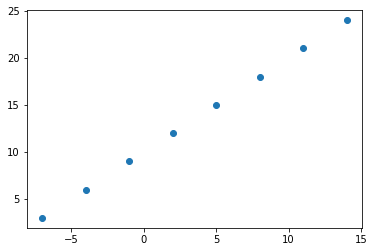

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# if you wanted to figure out the relationship between X and y, what might you do? // video 31 // 4.21.10
plt.scatter(X, y)



In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and Output shapes




In [5]:
# create a demo tensor for our housing price prediction problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
# turn our numpy arrays into tensors 
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

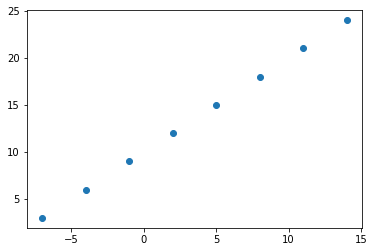

In [14]:
plt.scatter(X, y)

## steps in modelling with tensorflow 

1. **creating a model** -  define the input and output layers, as well as the hidden layers of a neural network (deep learning) 
2. **compile a model** - define the loss function (in other words, the function that tells our model how wrong it is) and the optimiser (the optimiser tells the model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of the model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels)

In [15]:
# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1)
])

# 2. compile the model 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
              optimizer=tf.keras.optimizers.SGD(), # SGD = Stochastic Gradient Descent 
              metrics=["mae"])

# 3. fit the model 
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 538ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 10.9748 - mae: 10.9748


In [16]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# 4. evaluate = try to make a prediction using our model 
model.predict([17.0])


array([[12.716021]], dtype=float32)

what we can see here is that our model is quite far off, looking above at the output of X, y, we can see that there is a 10 point difference between the input and output, but looking further above we can see the model has an error rate of pretty much 11, that is to say that the model predicted a number and was around off by 11, the error was reducing, but the error remains. however, it is important to know that at this stage of the model, even adding 11 to the predicted output would still be wrong. We need to improve the model

In [18]:
# 3. fit the model # what happens if I just run it for more epochs ....
model.fit(X, y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 10.4448 - mae: 10.4448
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 10.3123 - mae: 10.3123
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 10.1798 - mae: 10.1798
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 10.0473 - mae: 10.0473
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 9.9148 - mae: 9.9148
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 9.7823 - mae: 9.7823
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 9.6498 - mae: 9.6498
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 9

In [19]:
# try to make a prediction using our model (having gone through more epochs)
model.predict([17.0])

array([[29.82101]], dtype=float32)

improving our model // video 33, 

### we can improve the model in all 3 steps: 

1. **creating a model** - here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layes, we might change the activation functions of each layer


2. **compile a model** - here we might change the optimization function or the perhaps the **learning rate ** (this is a hyper-parameter) of the optimization model


3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or give it more training data to learn from


In [20]:
# video 34

# let's make our model larger, more hidden layers and more neurons per layer 

# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. compile the model 
model2.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # ver ycommon and very useful optimizer, often the default you'd start with. The lr= is a learning rate, how much per step. 
              metrics=["mae"])

# 3. fit the model 
model2.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 604ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2643 - mae: 13.2643
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2256 - mae: 13.2256
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.1872 - mae: 13.1872
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1507 - mae: 13.1507
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1142 - mae: 13.1142
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0778 - mae: 13.0778
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0413 - mae: 13.0413
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0048 - mae: 13.0048
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9683 - mae: 12.9683
Epoch 11/100
1/1 [==============================] - 0

In [21]:
# 4. Evaluate = try to make a prediction using our new model 
model2.predict([17.0])

array([[10.712195]], dtype=float32)

In [22]:
# let's make our model larger, more hidden layers and more neurons per layer 

# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. compile the model 
model3.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
              optimizer=tf.keras.optimizers.SGD(), # ver ycommon and very useful optimizer, often the default you'd start with. The lr= is a learning rate, how much per step. 
              metrics=["mae"])

# 3. fit the model 
model3.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 428ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8554 - mae: 12.8554
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4230 - mae: 12.4230
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9513 - mae: 11.9513
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4463 - mae: 11.4463
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8730 - mae: 10.8730
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1900 - mae: 10.1900
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3550 - mae: 9.3550
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3088 - mae: 8.3088
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0221 - mae: 7.0221
Epoch 11/100
1/1 [==============================] - 0s 7ms/ste

In [23]:
# 4. Evaluate = try to make a prediction using our new model 
model3.predict([17.0])

array([[31.844091]], dtype=float32)

In [24]:
# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model3b = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. compile the model 
model3b.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
              optimizer=tf.keras.optimizers.SGD(), # very common and very useful optimizer, often the default you'd start with. The lr= is a learning rate, how much per step. 
              metrics=["mae"])

# 3. fit the model 
model3b.fit(X, y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 433ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 12.8554 - mae: 12.8554
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 12.4230 - mae: 12.4230
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 11.9513 - mae: 11.9513
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 11.4463 - mae: 11.4463
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 10.8730 - mae: 10.8730
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 10.1900 - mae: 10.1900
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 9.3550 - mae: 9.3550
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 8.3088 - mae: 8.3088
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 7.0221 - mae: 7.0221
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss

In [25]:
# 4. Evaluate = try to make a prediction using our new model 
model3b.predict([17.0])

array([[34.23429]], dtype=float32)

at time of running, the prediction was 34.x, this is worse than an earlier model, therefore this may now be over-fitting. 

not all of our changes will lead to an improved model, this is a key concept, this is key to making many small changes rather than making one large change. 

In following code, we're going to change the **learning rate** (lr) which is often the single biggest change you can make to a model

In [26]:
# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. compile the model 
model4.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # ver ycommon and very useful optimizer, often the default you'd start with. The lr= is a learning rate, how much per step. 
              metrics=["mae"])

# 3. fit the model 
model4.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 430ms/step - loss: 11.9988 - mae: 11.9988
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3689 - mae: 11.3689
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7369 - mae: 10.7369
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1021 - mae: 10.1021
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5563 - mae: 9.5563
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0396 - mae: 9.0396
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.5056 - mae: 8.5056
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.9525 - mae: 7.9525
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3796 - mae: 7.3796
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7852 - mae: 6.7852
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [27]:
# 4. Evaluate = try to make a prediction using our new model 
model4.predict([17.0])

array([[27.686483]], dtype=float32)

at the time of running, this produced a prediction of 27.68x vs what we the 27 we might expect to see in Human provided data, this is our best model yet

## evaluating a Model 

Video 36 // 5.17

in practice a typical workflow when building a neural network is

```
build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> etc etc etc 
```

**Hyper Parameter** = a dial on Neural Network that you can adjust to help your network

**Parameter** = usually the patterns the neural network learns (we don't code them ourselves) 



when it comes to **evaluation**, you need to remeber: 

"Visualise, Visualise, Visualise" 

It's a good idea to visualise:
* The Data - what Data are we working with, what does it look like
* The Model - what does our model look like
* The Training - how does a model perform while it learns 
* The Predictions - how do the predictions of a model line up against the ground truth (the original labels) 



In [28]:
# Make a bigger dataset
X2 = tf.cast([tf.range(-100, 100, 4)], dtype=tf.float32)
X2

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.]], dtype=float32)>

In [29]:
# Make labels for the dataset
y2 = X2 + 10 
y2

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.]], dtype=float32)>

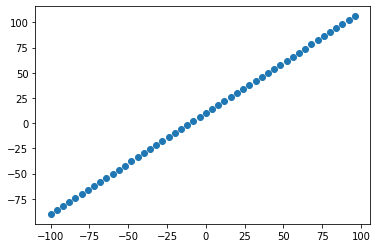

In [30]:
# visualise the data
import matplotlib.pyplot as plt

plt.scatter(X2, y2)

### The 3 sets...

The concept of the 3 sets



In [31]:
# try to split the dataset into 80/20 (train/test)

## from sklearn.model_selection import train_test_split
## X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=33)

# the above did not work, I will resume video for further ideas..

(video 37)

### the 3 sets

* **Training set** = 70-80% of total data available to you (Typical)
* **Validation set** = model gets tuned (basically like a dry-run test) (typically 10-15% of your available data)
* **Test set** = model gets **evaluated** against this data to test what it has learned, this is typically 10-15% of available data

As real-world example think of a university: 

* **Training set** = course materials
* **Validation set** = practice exam
* **Test set** = final exam

In [32]:
# check the length of how many samples we have

X2 = tf.range(-100, 100, 4)
y2 = X2 + 10 
len(y2), len(X2)

(50, 50)

In [33]:
# split the data into train and test sets

X2_train = X2[:40] # this gives us the first 40 training samples (80%)
X2_test = X2[40:] # this gives us what is available after the first 40, as such, the final 20% in this case

y2_train = y2[:40]
y2_test = y2[40:]

len(y2_train), len(X2_train), len(y2_test), len(X2_test)

(40, 40, 10, 10)

### visualising the data 

now we have the data in training and test sets, let's visualise it again ! 

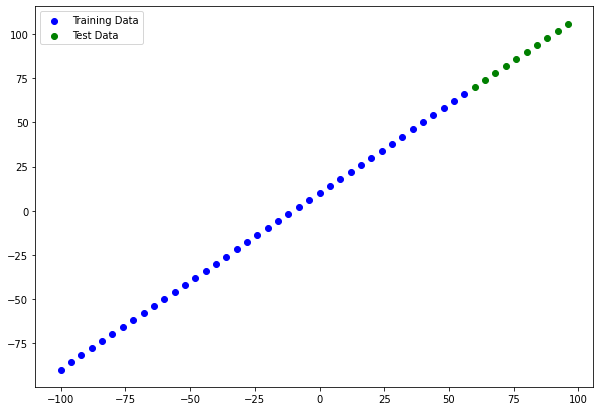

In [34]:
plt.figure(figsize=(10, 7))
# plot training data in blue 
plt.scatter(X2_train, y2_train, c="b", label="Training Data")
# plot the test data in green 
plt.scatter(X2_test, y2_test, c="g", label="Test Data")
# show a legend
plt.legend();

In [35]:
# video 38 

# let's have a look at how to build a neural network for our new data 

# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # comparing 1 against 1 - this might be important to read again later.
])

# 2. compile the model 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
  optimizer=tf.keras.optimizers.SGD(), # SGD = Stochastic Gradient Descent 
  metrics=["mae"])

# 3. fit the model 
# model.fit(X2_train, y2_train, epochs=100)

In [36]:
# lets try to visualise the model before we run it: 

# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # input shape - video 38 // 5.41.25
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error - comparisons of predicted vs observed (labels and predictions)
  optimizer=tf.keras.optimizers.SGD(), # SGD = Stochastic Gradient Descent 
  metrics=["mae"])

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


```
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_17 (Dense)             (None, 1)                 2         
=================================================================
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
```
##**What are we looking at here? **

**dense**_17 (Dense)  = connected, each input is connected to all of the outputs, look at an image search for connected yaers to see more on this

**Total params:** 2 == equal to trainable parameters in the model 
**Trainable params:** 2 == patterns the model updates as it learns 
**Non-trainable params:** 0 == you might lock parameters if you were using a pre-trained model, you don't want to break something you already know works for example, now in our specific model, we do not have non-trainable params. *transfer learning - coming soon...*



In [38]:
# 3. fit the model 
model.fit(X2_train, y2_train, epochs=100, verbose=0) # verbose = 0 hides the output (progress bars from each epoch)

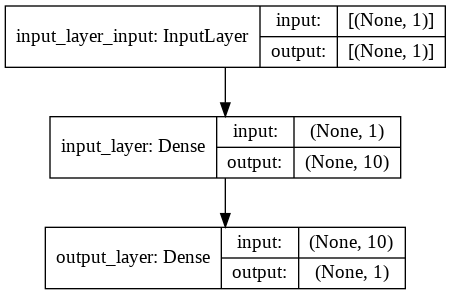

In [39]:
# another way to visualise our model 

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualising our model's predictions

to visualise predictions, it is a good idea to plot them against the ground truth labels. 

Often you will see this in the form of something like : `y_test` or `y_true` versus `y_pred` (ground truth versus your models prediction)

In [40]:
# make some predictions // # video 40
y2_pred = model.predict(X2_test) #using X2_test dataset
y2_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [41]:
y2_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**NB** if you feel like you are going to reuse some kind of functionality in the future, then it is a good idea to turn it into a function

```
# let's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  ```

 ** the use of the 3x" creates a doc-string!! **

In [42]:
X2_train, X2_test, y2_train, y2_test,

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [43]:
# let's create a plotting function 

def plot_predictions(train_data=X2_train,
                     train_labels=y2_train,
                     test_data=X2_test,
                     test_labels=y2_test,
                     predictions=y2_pred):
  
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
plot_predictions(train_data)

NameError: ignored

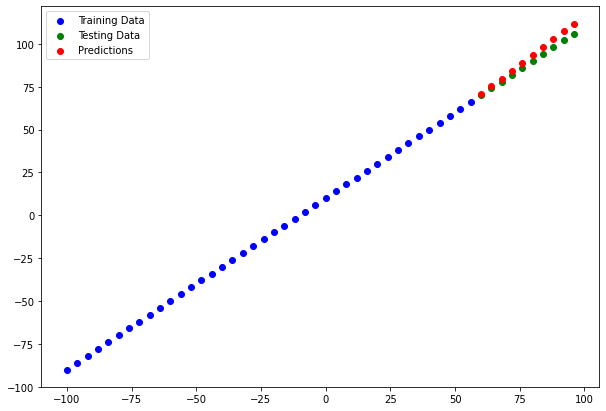

In [44]:
### this doesn't work for me

### # let's create a plotting function 

### def plot_predictions(train_data=X2_train,
###                      train_labels=y2_train,
###                      test_data=X2_test,
###                      test_labels=y2_test,
###                      predictions=y2_pred):
  
###   """
###   Plots training data, test data and compares predictions to ground truth labels
###   """

plt.figure(figsize=(10, 7))
# plot training data in blue 
plt.scatter(X2_train, y2_train, c="b", label="Training Data")
# plot testing data in green 
plt.scatter(X2_test, y2_test, c="g", label="Testing Data")
# plot model's predictions in red
plt.scatter(X2_test, y2_pred, c="r", label="Predictions")
# show the legend
plt.legend();

### Evaluating our model's predictions with regression evaluation metrics

Video 41 /// 6.09.12

Depending on the problem that you're working on,there will be different evaluation metrics to evaluate your models performance.

Since we're working on a regression, two of the main metrics: 

* **mea** - Mean Absolute Error = ```on average, how wrong is each of my models predictions```
* **mse** - Mean Square Error = ```similar to **mea** but you square the average errors```

*some common* Regression evaluation metrics

**Mean Absolute Error (mae)** = ```tf.keras.losses.mae()``` **or** ```tf.metrics.mean_absulute_error()``` = *a great starter metric for any regression problem*

**Mean Squared Error (mse)** = ```tf.keras.losses.mse()``` **or** ```tf.metrics.mean_squared_error()``` = *When larger errors are more significant than smaller errors*

**Huber** = ```tf.keras.losses.huber()``` = *Cobination of MSE and MAE. Less sensitive to **outliers** than MSE*

In [46]:
# evaluate the model on the test set
model.evaluate(X2_test, y2_test)

1/1 [==============================] - 0s 23ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [51]:
# calculate the mean absolute error

# mae = tf.keras.losses.MeanAbsoluteError() # I got this example from the tf documentation
# mae(y2_test, y2_pred).numpy() # I got this example from the tf documentation # at runtime, mae = 14.529

# back to video... # calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y2_test, y2_pred)
# mae = tf.metrics.mean_absolute_error(y_true=y2_test, y_pred=y2_pred) # incidentally, this line also works, nice to see how you can link doc to dev
mae # the output here was a one MAE per data ?? 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [53]:
tf.constant(y2_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [47]:
y2_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [54]:
tf.squeeze(y2_pred) # we want to get rid of one of the dimensions

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [57]:
# evaluate the model on the test set
model.evaluate(X2_test, y2_test) # the output from this at runtime = 3.196

1/1 [==============================] - 0s 23ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [56]:
# calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y2_test, tf.squeeze(y2_pred))
mae # the output from this at runtime = 3.196 as per the output from evaluate = this is what we want! 

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [59]:
# calculate the mean squared error

mse = tf.metrics.mean_squared_error(y2_test, tf.squeeze(y2_pred))
mse # output at runtime was 13.070 for me # this is the output from the video as well

# this shows that this operation is probably not suitable to our model?

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [60]:
# calculate using huber

mod_hub = tf.keras.losses.huber(y2_test, tf.squeeze(y2_pred))
mod_hub # output at runtime was 2.706 for me 

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069678>

### Running experiments to improve our model

```
build a model -> fit it -> teak it -> evaluate it it -> etc 
``` 

the machine learning **explorers** motto = *visualise, visualise, visualise* 
the machine learning **practitioners** motto = *experiment, experiment, experiment* 

way to improve model: 

1. get more data = get more examples for the model to train on
2. make the model larger - using a more complex model, perhaps in the form of more layers or more hidden units in each layer) 
3. train for longer - more epochs, more of a chance to find the patterns in the data 




In [61]:
X2_train, y2_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

let's do 3 modelling experiments: 

1. ``` model_1``` - same as original, but for 100 epochs 
2. ```model_2``` - 2 layers, 100 epochs 
3. ```model_3``` - 2 layers, 500 epochs 



In [63]:
# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1) 
])

# 2. compile the model 
model_1.compile(loss=tf.keras.losses.mae, 
  optimizer=tf.keras.optimizers.SGD(), 
  metrics=["mae"])

# 3. fit the model 
model_1.fit(X2_train, y2_train, epochs=100, verbose=0)

In [66]:
# evaluate the model on the test set
model_1.evaluate(X2_test, y2_test) 

1/1 [==============================] - 0s 104ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

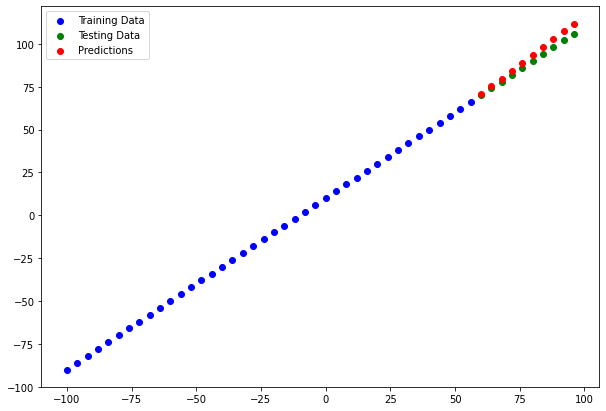

In [67]:
plt.figure(figsize=(10, 7))
# plot training data in blue 
plt.scatter(X2_train, y2_train, c="b", label="Training Data")
# plot testing data in green 
plt.scatter(X2_test, y2_test, c="g", label="Testing Data")
# plot model's predictions in red
plt.scatter(X2_test, y2_pred, c="r", label="Predictions")
# show the legend
plt.legend();

In [68]:
# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1) 
])

# 2. compile the model 
model_2.compile(loss=tf.keras.losses.mae, 
  optimizer=tf.keras.optimizers.SGD(), 
  metrics=["mae"])

# 3. fit the model 
model_2.fit(X2_train, y2_train, epochs=100, verbose=0)

In [72]:
# evaluate the model on the test set
model_2.evaluate(X2_test, y2_test) 

1/1 [==============================] - 0s 100ms/step - loss: 12.6907 - mae: 12.6907


[12.690732955932617, 12.690732955932617]

In [74]:
# set a random seed (reproducability) 
tf.random.set_seed(42)

# 1. create the model using the sequential API 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1) 
])

# 2. compile the model 
model_3.compile(loss=tf.keras.losses.mae, 
  optimizer=tf.keras.optimizers.SGD(), 
  metrics=["mae"])

# 3. fit the model 
model_3.fit(X2_train, y2_train, epochs=500, verbose=0)

# evaluate the model on the test set
model_3.evaluate(X2_test, y2_test) 

1/1 [==============================] - 0s 98ms/step - loss: 2.8462 - mae: 2.8462


[2.8461692333221436, 2.8461692333221436]

In [76]:
model.evaluate(X2_test, y2_test) 
model_1.evaluate(X2_test, y2_test) 
model_2.evaluate(X2_test, y2_test) 
model_3.evaluate(X2_test, y2_test) 

1/1 [==============================] - 0s 18ms/step - loss: 2.8462 - mae: 2.8462


[2.8461692333221436, 2.8461692333221436]

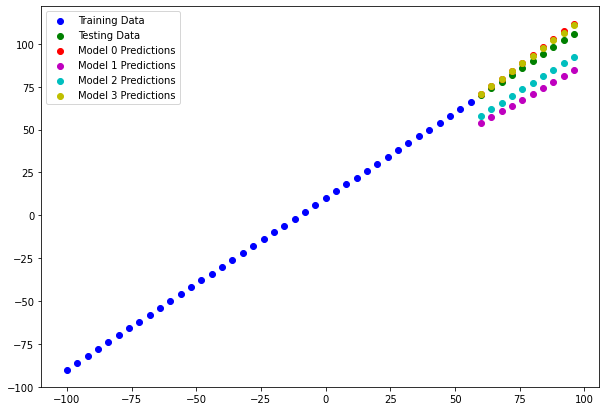

In [83]:
plt.figure(figsize=(10, 7))
# plot training data in blue 
plt.scatter(X2_train, y2_train, c="b", label="Training Data")
# plot testing data in green 
plt.scatter(X2_test, y2_test, c="g", label="Testing Data")
# plot model's predictions in red (model 0)
y_preds_0 = model.predict(X2_test)
plt.scatter(X2_test, y_preds_0, c="r", label="Model 0 Predictions")

# plot model's predictions in red (model 1)
y_preds_1 = model_1.predict(X2_test)
plt.scatter(X2_test, y_preds_1, c="m", label="Model 1 Predictions")

# plot model's predictions in red (model 2)
y_preds_2 = model_2.predict(X2_test)
plt.scatter(X2_test, y_preds_2, c="c", label="Model 2 Predictions")

# plot model's predictions in red (model 3)
y_preds_3 = model_3.predict(X2_test)
plt.scatter(X2_test, y_preds_3, c="y", label="Model 3 Predictions")


# show the legend
plt.legend();

### Saving our model 

saving our models allows us to use them outside of Google Colab or wherever they were trained, such as in a web or mobile app. 

there are two main formats we can save our model 2:

**SavedModel format**
models saved like this can be restored using ```tf.kera.models.load_model``` 

**HDF5 standard**



In [89]:
# save a model using the savedmodel format

model_2.save("model_2_from_the_training_video") # look in the files menu within colab (to the left)

INFO:tensorflow:Assets written to: model_2_from_the_training_video/assets


In [91]:
model_2.save('model_2_from_the_training_videoh5.h5') # look in the files menu within colab (to the left)